In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from matplotlib.gridspec import GridSpec


2023-08-01 23:10:44.342319: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-01 23:10:44.344491: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-01 23:10:44.388614: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-01 23:10:44.389431: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-01 23:10:45.174058: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [ ]:
# train_pool_X, train_pool_y), (test_X, test_y) = tf.keras.datasets.mnist.load_data()
# train_X, Pool_X, train_y,  Pool_y = train_test_split(train_pool_X, train_pool_y, train_size=10, random_state=42)
# print(train_X.shape, Pool_X.shape, train_y.shape, Pool_y.shape, test_X.shape, test_y.shape)


In [ ]:
# train_pool_X = pool_X_train.reshape(train_pool_X.shape[0], -1)
# train_X = train_X.reshape(train_X.shape[0], -1)
# test_X = test_X.reshape(test_X.shape[0], -1)
# Pool_X = Pool_X.reshape(Pool_X.shape[0], -1)
# print(train_pool_X.shape, train_X.shape, test_X.shape, Pool_X.shape)

In [2]:
def split_dataset_with_equal_class_representation(train_data, train_labels, test_ratio=0.2):
    classes = np.unique(train_labels)
    num_classes = len(classes)

    # Split data into class-specific subsets
    class_data = [train_data[train_labels == c] for c in classes]

    # Calculate the number of samples to include from each class in the test set
    num_samples_per_class = int(len(train_data) * test_ratio / num_classes)

    # Initialize train and test datasets
    train_data_split = []
    test_data_split = []
    train_labels_split = []
    test_labels_split = []

    # Split data for each class
    for c in range(num_classes):
        data_c = class_data[c]
        num_samples_test_c = min(num_samples_per_class, len(data_c))

        # Randomly shuffle the data
        np.random.shuffle(data_c)

        # Split data for class c into train and test sets
        train_data_c = data_c[:-num_samples_test_c]
        test_data_c = data_c[-num_samples_test_c:]

        # Assign labels for each split
        train_labels_c = np.full(len(train_data_c), classes[c])
        test_labels_c = np.full(len(test_data_c), classes[c])

        # Append class-specific data to overall train and test datasets
        train_data_split.append(train_data_c)
        test_data_split.append(test_data_c)
        train_labels_split.append(train_labels_c)
        test_labels_split.append(test_labels_c)

    # Concatenate class-specific data to create final train and test datasets
    train_data_final = np.concatenate(train_data_split, axis=0)
    test_data_final = np.concatenate(test_data_split, axis=0)
    train_labels_final = np.concatenate(train_labels_split, axis=0)
    test_labels_final = np.concatenate(test_labels_split, axis=0)

    # Shuffle the data again to ensure randomness
    train_indices = np.arange(len(train_data_final))
    np.random.shuffle(train_indices)
    train_data_final = train_data_final[train_indices]
    train_labels_final = train_labels_final[train_indices]

    test_indices = np.arange(len(test_data_final))
    np.random.shuffle(test_indices)
    test_data_final = test_data_final[test_indices]
    test_labels_final = test_labels_final[test_indices]

    return (train_data_final, train_labels_final), (test_data_final, test_labels_final)

# Load MNIST dataset
(train_data, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values to [0, 1]
train_data = train_data.astype('float32') / 255.0

# Reshape the data to 4D tensor (number of samples, height, width, channels)
train_data = np.expand_dims(train_data, axis=-1)

# Split data into train and test sets with equal class representation
(train_data, train_labels), (test_X, test_y) = split_dataset_with_equal_class_representation(train_data, train_labels, test_ratio=0.2)
(train_X, train_y), (Pool_X, Pool_y) = split_dataset_with_equal_class_representation(train_data, train_labels, test_ratio=0.8)

print("Train data shape:", train_X.shape)
print("Train labels shape:", train_y.shape)
print("Test data shape:", Pool_X.shape)
print("Test labels shape:", Pool_y.shape)
print("Test data shape:", test_X.shape)
print("Test labels shape:", test_y.shape)

Train data shape: (9600, 28, 28, 1)
Train labels shape: (9600,)
Test data shape: (38400, 28, 28, 1)
Test labels shape: (38400,)
Test data shape: (12000, 28, 28, 1)
Test labels shape: (12000,)


In [ ]:
# train_pool_X, train_pool_y), (test_X, test_y) = tf.keras.datasets.mnist.load_data()
# train_X, Pool_X, train_y,  Pool_y = train_test_split(train_pool_X, train_pool_y, train_size=10, random_state=42)
# print(train_X.shape, Pool_X.shape, train_y.shape, Pool_y.shape, test_X.shape, test_y.shape)

In [3]:

train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)
Pool_X = Pool_X.reshape(Pool_X.shape[0], -1)
print(train_X.shape, test_X.shape, Pool_X.shape)

(9600, 784) (12000, 784) (38400, 784)


In [4]:
model = LogisticRegression(max_iter=10000)


In [ ]:
def add_random_samples(train_X, train_y, pool_X_train, pool_y_train, number_of_sample=1,seed=0):
    np.random.seed(seed)
    random_indices = np.random.choice(pool_X_train.shape[0], size=number_of_sample, replace=False)
    labeled_X = pool_X_train[random_indices]
    labeled_y = pool_y_train[random_indices]
    train_X = np.concatenate((train_X, labeled_X), axis=0)
    train_y = np.concatenate((train_y, labeled_y), axis=0)
    pool_X_train = np.delete(pool_X_train, random_indices, axis=0)
    pool_y_train = np.delete(pool_y_train, random_indices)
    return train_X, train_y, pool_X_train, pool_y_train

In [ ]:
def active_learning_sampling(train_X, train_y, pool_X_train, pool_y_train, pool_X_test, y_test,num_iterations=3, number_of_sample=1,seed=0):
    accuracy_iteration = []
    for _ in range(num_iterations):
        model = LogisticRegression(max_iter=1000)
        train_X, train_y, pool_X_train, pool_y_train = add_random_samples(train_X, train_y, pool_X_train, pool_y_train, number_of_sample,seed)
        model.fit(train_X, train_y)
        y_pred = model.predict(pool_X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_iteration.append(accuracy)
        
    accuracy_iteration = np.array(accuracy_iteration)
    mean_accuracy = np.mean(accuracy_iteration)
    std_accuracy = np.std(accuracy_iteration)
    return accuracy_iteration , mean_accuracy, std_accuracy

In [ ]:
num_iterations = 50
num_seeds = 50  
iterations = range(1, num_iterations + 1)

mean_accuracy_all_seeds = []
std_accuracy_all_seeds = []

for seed in range(42, 42 + num_seeds):
    accuracy_after_random_sampling, _, _ = active_learning_sampling(train_X, train_y, Pool_X, Pool_y, test_X, test_y, num_iterations, 1, seed)
    mean_accuracy_all_seeds.append(np.mean(accuracy_after_random_sampling))
    std_accuracy_all_seeds.append(np.std(accuracy_after_random_sampling))

mean_accuracy_all_seeds = np.array(mean_accuracy_all_seeds)
std_accuracy_all_seeds = np.array(std_accuracy_all_seeds)
mean_accuracy_all_seeds = np.round(mean_accuracy_all_seeds, 3)
std_accuracy_all_seeds = np.round(std_accuracy_all_seeds, 3)
print(mean_accuracy_all_seeds)
print(std_accuracy_all_seeds)

In [ ]:
plt.plot(iterations, mean_accuracy_all_seeds,color='red', label='Mean accuracy')
plt.fill_between(iterations, mean_accuracy_all_seeds - std_accuracy_all_seeds, mean_accuracy_all_seeds + std_accuracy_all_seeds, alpha=0.3, color='gray', label='Standard deviation')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.grid()

In [ ]:
def random_sample(p,number_of_sample=1):
    num_samples = p.shape[0]
    sample = np.random.choice(num_samples, size=number_of_sample, replace=False)
    return sample

In [5]:
def entropy(p):
    # print((-np.sum(p * np.log2(p), axis=1)).shape)
    return -np.sum(p * np.log2(p), axis=1)

In [ ]:
def margin_sampling(probabilities):
    sorted_probs = np.sort(probabilities, axis=1)
    return (1 - np.max(probabilities, axis=1)) - sorted_probs[:, -2]

In [ ]:
def least_confident(probabilities):
    return 1 - np.max(probabilities, axis=1)

In [6]:

def active_learning(train_X, train_y, pool_X_train, pool_y_train, pool_X_test, y_test, acquisition_function, num_iterations, number_of_sample=1):
    new_indices_list = []
    accuracy_iteration = []

    for iter in range(num_iterations):
        model = LogisticRegression(max_iter=10000)
        model.fit(train_X, train_y)

        pool_probabilities = model.predict_proba(pool_X_train)
        # print(pool_probabilities)
        if(iter==0):
            print(pool_probabilities)
        print(pool_probabilities.shape)
        acquisition_scores = acquisition_function(pool_probabilities)
        
        selected_indices = np.argsort(acquisition_scores)[-number_of_sample:]

        labeled_X = pool_X_train[selected_indices]
        labeled_y = pool_y_train[selected_indices]
        
        new_indices_list.append(selected_indices)

        train_X = np.concatenate((train_X, labeled_X), axis=0)
        train_y = np.concatenate((train_y, labeled_y), axis=0)

        pool_X_train = np.delete(pool_X_train, selected_indices, axis=0)
        pool_y_train = np.delete(pool_y_train, selected_indices)
        
        
        y_pred = model.predict(pool_X_test)
        accuracy = accuracy_score(y_test, y_pred)
        # print("Accuracy score after iteration {}: {:.4f} ".format(_ + 1, accuracy))

        accuracy_iteration.append(accuracy)

    return  accuracy_iteration , new_indices_list


In [ ]:
accuracy_least_random,new_indices_list = active_learning(train_X, train_y, Pool_X, Pool_y, test_X, test_y, acquisition_function=entropy, num_iterations=9, number_of_sample=1)
num_rows =  3
num_cols = 3

grid = GridSpec(num_rows, num_cols,figure=fig)
fig = plt.figure(figsize=(8, 6))

for i in range(num_rows):
    for j in range(num_cols):
        idx = new_indices_list[i * num_cols + j][0]
        ax = fig.add_subplot(grid[i, j])
        ax.imshow(Pool_X[idx].reshape(28, 28), cmap='gray') 
        ax.set_title(f'Iteration {i * num_cols + j + 1}, Index {idx}')
        ax.axis('off')
plt.tight_layout()


In [ ]:
accuracy_least_random,new_indices_list1 = active_learning(train_X,train_y,Pool_X, Pool_y, test_X, test_y, acquisition_function=random_sample,
                                                                                                 num_iterations=100,
                                                                                                 number_of_sample=10)

In [9]:
accuracy_least_entropy,new_indices_list2 = active_learning(train_X,train_y,Pool_X, Pool_y, test_X, test_y, acquisition_function=entropy,
                                                                                                 num_iterations=50,
                                                                                                 number_of_sample=50)

[[2.13079647e-03 1.08251094e-04 2.81521655e-05 ... 1.08306566e-02
  1.61751095e-03 8.50642192e-04]
 [1.96310957e-06 8.87863017e-08 6.80412966e-08 ... 5.88049187e-01
  2.50416194e-05 7.59609438e-02]
 [1.42176930e-03 9.57306870e-04 1.34884857e-02 ... 1.48358345e-07
  1.44929499e-03 1.35466782e-06]
 ...
 [9.99507383e-01 8.45314442e-12 7.43356307e-05 ... 5.74817956e-07
  2.12643287e-04 4.24074941e-05]
 [1.12770948e-07 9.96543765e-01 2.12191108e-04 ... 1.31373183e-06
  2.73312911e-03 2.00516003e-05]
 [8.11391890e-08 1.38918898e-15 2.22811556e-14 ... 9.88700009e-01
  8.65115349e-07 1.12955172e-02]]
(38400, 10)
(38350, 10)
(38300, 10)
(38250, 10)
(38200, 10)
(38150, 10)
(38100, 10)
(38050, 10)
(38000, 10)
(37950, 10)
(37900, 10)
(37850, 10)
(37800, 10)
(37750, 10)
(37700, 10)
(37650, 10)
(37600, 10)
(37550, 10)
(37500, 10)
(37450, 10)
(37400, 10)
(37350, 10)
(37300, 10)
(37250, 10)
(37200, 10)
(37150, 10)
(37100, 10)
(37050, 10)
(37000, 10)
(36950, 10)
(36900, 10)
(36850, 10)
(36800, 10)
(367

In [ ]:
accuracy_least_margin,new_indices_list2 = active_learning(train_X,train_y,Pool_X, Pool_y, test_X, test_y,acquisition_function=margin_sampling,
                                                                                                 num_iterations=100,
                                                                                                 number_of_sample=10)

In [ ]:
accuracy_confident,new_indices_list3 = active_learning(train_X,train_y,Pool_X, Pool_y, test_X, test_y,acquisition_function=least_confident,
                                                                             num_iterations=100,
                                                                             number_of_sample=10)

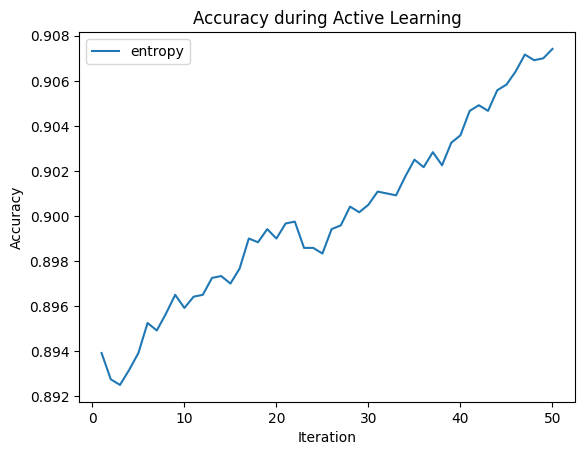

In [10]:
# plt.plot(range(1, len(accuracy_least_margin) + 1), accuracy_least_margin,label='Margin Sampling')
plt.plot(range(1, len(accuracy_least_entropy) + 1), accuracy_least_entropy, label='entropy')
# plt.plot(range(1, len(accuracy_confident) + 1), accuracy_confident,label='Least Confident')
# plt.plot(range(1, len(accuracy_least_random) + 1), accuracy_least_random,label='Random Sampling')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy during Active Learning')
plt.legend();

In [ ]:
def enable_dropout(m):
    if type(m) == mod